# Project Phase 1

## Table of Contents
 
  * [Introduction](#Introduction) 
    + [Dataset Source](#Dataset_Source) 
    + [Dataset Details](#Dataset_Details) 
    + [Dataset Features](#Dataset_Features)
    + [Target Feature](#Target_Feature) 
  * [Goals & Objectives](#Goals_Objectives) 
  * [Data Cleaning & Preprocessing](#Data_Preprocessing) 
    + [Data Overview](#Data_Overview) 
    + [Irrelevant Features](#Irrelevant_Feature) 
    + [Checking for Missing Values](#Missing_Value) 
    + [Handling Outliers](#Handling_Outliers)
    + [Discretizing Numeric Features](#Age_Discrete)
    + [One-Hot Encoding](#Encoding_Nominal_Features) 
    + [Scaling Descriptive Features](#Scaling_Descriptive_Features) 
    + [Readiness to Fit Scikit-Learn Models](#Model_Fitting)      
  * [Data Exploration & Visualisation](#Data_Exploration_Visualisation) 
    + [One-Variable Plots](#One_Plots) 
    + [Two-Variable Plots](#Two_plots) 
    + [Three-Variable Plots](#Three_Plots) 
  * [References](#References) 

## Introduction <a id='Introduction'></a>

### Dataset Source <a name='Dataset_Source'></a>

Data is obtained from the following link:

- UCI Machine Learning Repository: Bank Marketing Data Set. (2021). Retrieved 21 March 2021, from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Dataset Details <a id='Dataset_Details'></a>

The selected dataset is related to the direct marketing campaigns of a Portuguese banking institution, which contains personal details and financial status of the clients. These direct marketing campaigns were conducted through phone calls in order to confirm whether the clients have subscribed to the term deposits.

This dataset contains 4521 observations and 17 attributes.

### Dataset Features <a id='Dataset_Features'></a>

| Name of the feature | Data Type | Units | Description |
|----|---|---|----|
| `age` | numerical   |     years        |  age of client                   |
| `job` | categorical |  n/a         |  different category of job       |
| `marital`  | categorical | n/a     |  marital status of client (the divorced status includes both divorced and widowed) |
| `education`  | categorical |   n/a |  education history of client     |
| `default`  | binary      |  n/a    |  whether the client has default in Credit |
| `balance`  |  numerical |    Euros     |  average yearly balance of client         |
| `housing`  | binary |   n/a        |  whether the client has housing loan      |
| `loan`  | binary |   n/a           |  whether the client has personal loan     |
| `contact`  | categorical | n/a     |  last contact communication method        |
| `day`  |  numerical |   n/a        |  last contact day of the month            |
| `month` | categorical |   n/a      |  last contact month of the month          |
| `duration`  |  numerical | seconds     | Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.                    |
| `campaign`  |  numerical |   counts    |  number of contacts performed to this client during this campaign                 |
| `pdays`  |  numerical |    days        |  number of days passed since last contacted from previous campaign (-1 means not                                                                                                         contacted)               |
| `previous`  |  numerical |    counts   |  number of contacts performed before the current campaign               |
| `poutcome`  | categorical |  n/a   |  outcome of the previous marketing campaign                                       |
| `subscription`| binary | n/a       |  whether the client has subscribed to a term deposit  (a.k.a. 'y' target feature) |



### Target Feature <a id='Target_Feature'></a>

The target feature in this project is the attribute `subscription`.

## Goals & Objectives <a id='Goals_Objectives'></a>

The goals and objective of this project are to first explore and visualize the dataset, then clean and preprocess it as appropriately, so that the dataset is ready to be used to fit into a machine learning model that can predict whether a client will subscribe to the term deposit based on the relevant descriptive features.

## Data Cleaning & Preprocessing <a id='Data_Preprocessing'></a>

In [1]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")


# ignore warnings
import warnings
warnings.filterwarnings("ignore")


# display all columns pandas data frames 
pd.set_option('display.max_columns', None) 

In [2]:
# reading the dataset
bank = pd.read_csv("bank.csv", sep = ';')

### Data Overview<a id='Data_Overview'></a>

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# check the shape of the data
print(" Bank Data Shape: {} rows and {} columns".format(bank.shape[0] , bank.shape[1]))

 Bank Data Shape: 4521 rows and 17 columns


In [5]:
# check the information of the data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# check the numerical features
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of numerical features</b>'))
bank.describe(include='int64')

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
# check the categorical features
display(HTML('<b>Table 2: Summary of categorical features</b>'))
bank.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [8]:
# renaming target variable
bank.rename(columns = {'y' : 'subscription'}, inplace=True)

### Irrelevant Features <a id='Irrelevant_Features'></a>

**Reason:** `Duration`(call duration on last contact) is considered to be an unknown data at the time of the prediction. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call `Subscription`(i.e. target feature) is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [9]:
# dropping features
bank.drop('duration', inplace=True, axis = 1)

### Checking for Missing Values <a id='Missing_Value'></a>

In [10]:
# checking and adding up the missing values
bank.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

### Handling Outliers <a id='Handling_Outliers'></a>

From the descriptive analysis, it is noted that `pdays` contain -1. `pdays` is the column that indicates number of day passed and cannot have negative values.

Therefore, `pdays` is clamped into binary feature as follows:

- 0: not previously contacted
- 1: contacted earlier

In [11]:
# changing pdays to Categorical Variables 
bank['pdays'] = bank['pdays'].apply(lambda x: 0 if x == -1 else 1)

### Discretizing Numeric Features <a id='Age_Discrete'></a>

The age is grouped into categories as per the Age Standard used by [Australian Bureau of Statistics](https://www.abs.gov.au/)  :

- Children (0-14)
- Teen (15-24)
- Adult (25-64)
- Senior (65+)

In [12]:
# Discretizing Age 
bins = [0,15,25,65,120]
labels = ['Children', 'Teen', 'Adult', 'Senior']
bank['agegroup'] = pd.cut(bank.age, bins, labels = labels, include_lowest = True)


# rearrange
bank = bank[['age', 'agegroup', 'job', 'marital', 'education', 'default',
         'balance', 'housing', 'loan', 'contact', 'day', 'month', 
         'campaign', 'pdays', 'previous', 'poutcome', 'subscription']]

In [13]:
bank.agegroup.value_counts()

Adult       4327
Teen         111
Senior        83
Children       0
Name: agegroup, dtype: int64

In [14]:
bank.to_csv('bank_cleaned_data.csv', index=False)

### One-Hot Encoding <a id='Encoding_Nominal_Features'></a>

**Encoding Target Feature (i.e. subscription):**

- 0: No
- 1: Yes


All the categorical variables are encoded accordingly.

In [15]:
# choosing relevent columns
bank_model = bank[['age', 'agegroup', 'job', 'marital', 'education', 'default', 'balance',
                   'housing', 'loan', 'contact', 'day', 'month', 'campaign',
                   'pdays', 'previous', 'poutcome', 'subscription']]


# get the list of categorical descriptive features
categorical_cols = bank_model.columns[bank_model.dtypes==object].tolist()


# For feature with 2 levels, only binary variable is executed
for col in categorical_cols:
    n = len(bank_model[col].unique())
    if (n == 2):
        bank_model[col] = pd.get_dummies(bank_model[col], drop_first=True)

        
# for the rest of the categorical features (i.e more than 2 levels), one-hot-encoding is executed
# and the numerical features will be untouched
bank_dum = pd.get_dummies(bank_model)

In [16]:
bank_dum.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,subscription,agegroup_Children,agegroup_Teen,agegroup_Adult,agegroup_Senior,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,11,1,1,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [17]:
bank_dum.shape

(4521, 52)

### Scaling Descriptive Features <a id='Scaling_Descriptive_Features'></a>

In [18]:
from sklearn import preprocessing

In [19]:
# define min-maxing scaling
x = np.arange(10).reshape(-1, 1)
x = np.vstack((x, 100.0))

min_max = preprocessing.MinMaxScaler().fit_transform(x).ravel()

x_scaled_df = pd.DataFrame({'x': x.ravel(), 'min_max': min_max})

# column balance is scaled to be between 0 and 1
bank_dum[['balance']] = preprocessing.MinMaxScaler().fit_transform(bank_dum[['balance']])

In [20]:
bank_dum.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,subscription,agegroup_Children,agegroup_Teen,agegroup_Adult,agegroup_Senior,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,0.068455,0,0,19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,0,0.108750,1,1,11,1,1,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,0,0.062590,1,0,16,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,0,0.064281,1,1,3,4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,0.044469,1,0,5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [21]:
bank_dum.to_csv("bank_cleaned_data.csv", index = False)

### Readiness to Fit Scikit-Learn Models <a id='Model_Fitting'></a>

In [22]:
# convert "bank_dum" from a data frame to a NumPy arrays
bank_df = bank_dum.drop('subscription', axis=1).values
target = bank_dum.subscription.values

# Data Exploration & Visualisation <a id='Data_Exploration_Visualisation'></a>

## One-Variable Plots <a id='One_Plots'></a>

**Plot 1.1:** These plots show the visualization of the counts for all categorical variables with more than 2 levels from the dataset, namely the variables `job`, `marital`, `education`, `contact`, `month`, `poutcome` and `agegroup`.

Graph for job: total categories = 12


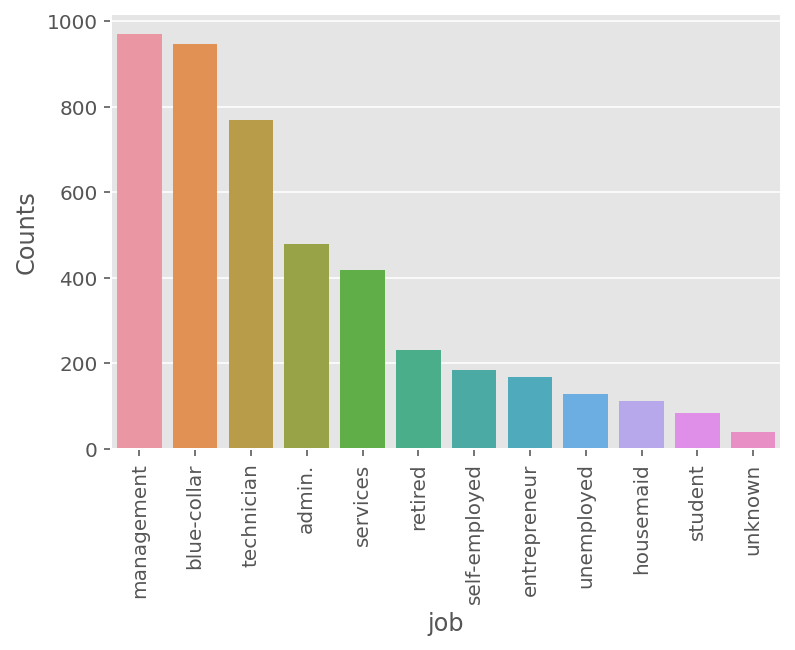

Graph for marital: total categories = 3


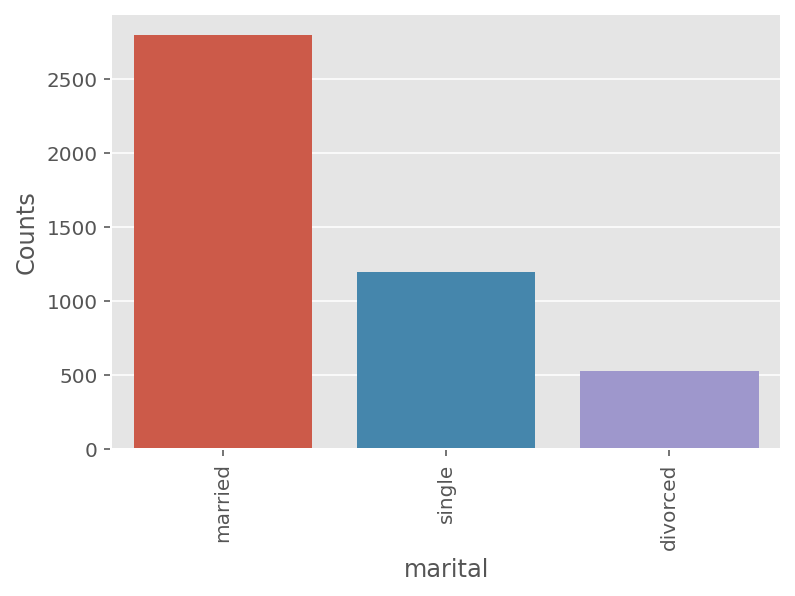

Graph for education: total categories = 4


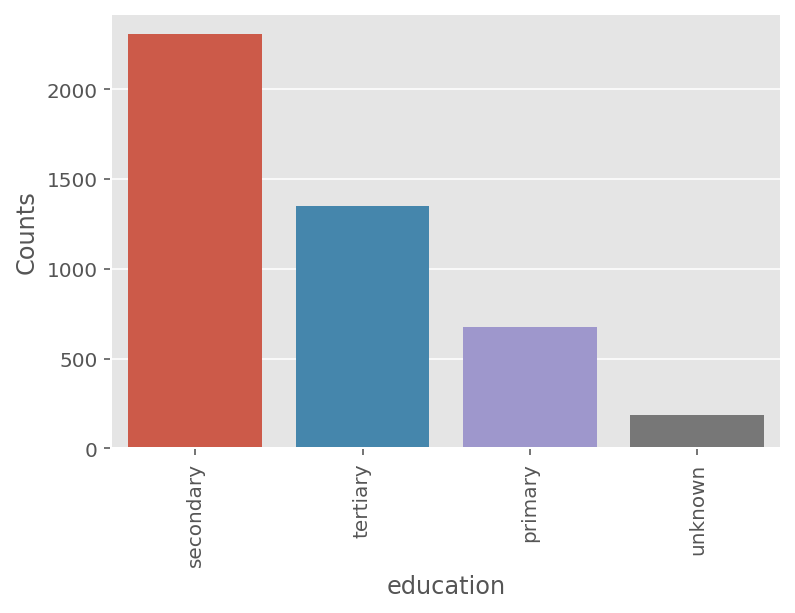

Graph for contact: total categories = 3


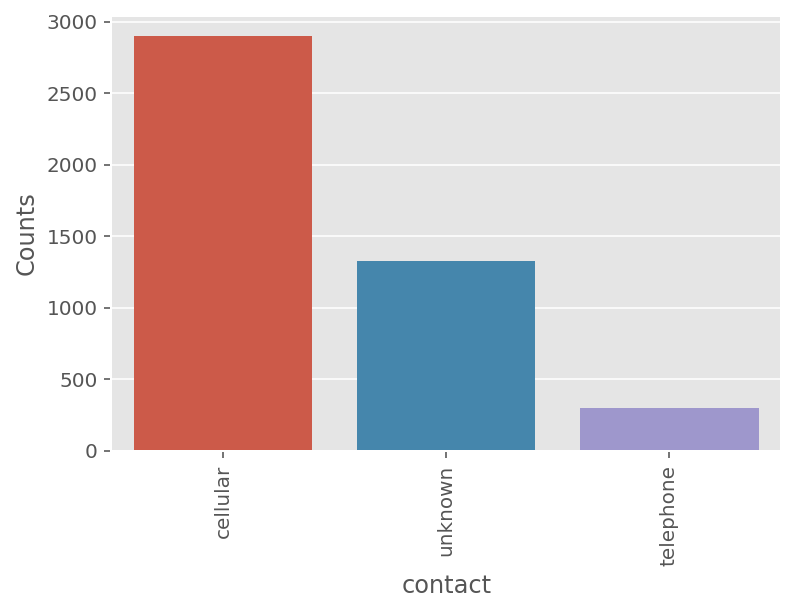

Graph for month: total categories = 12


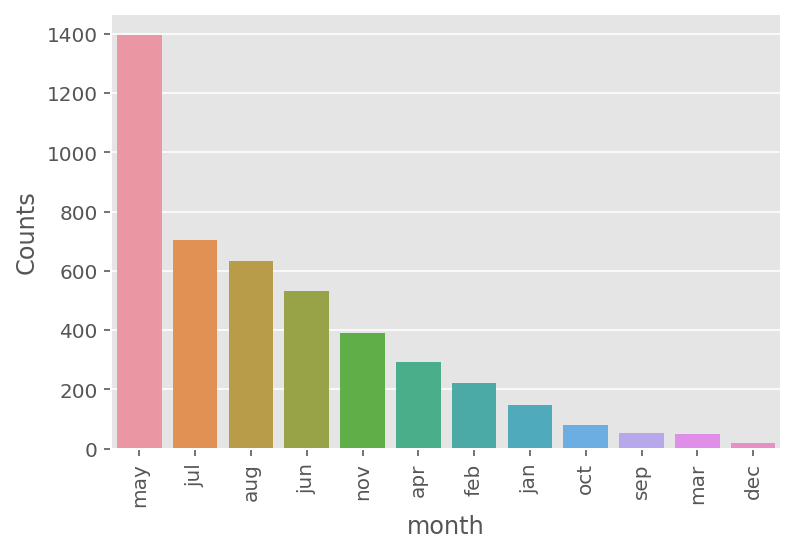

Graph for poutcome: total categories = 4


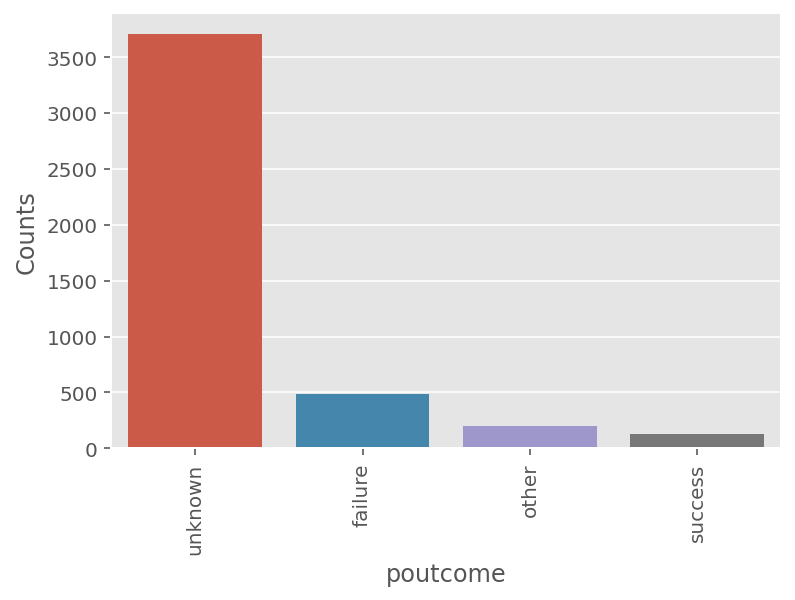

Graph for agegroup: total categories = 4


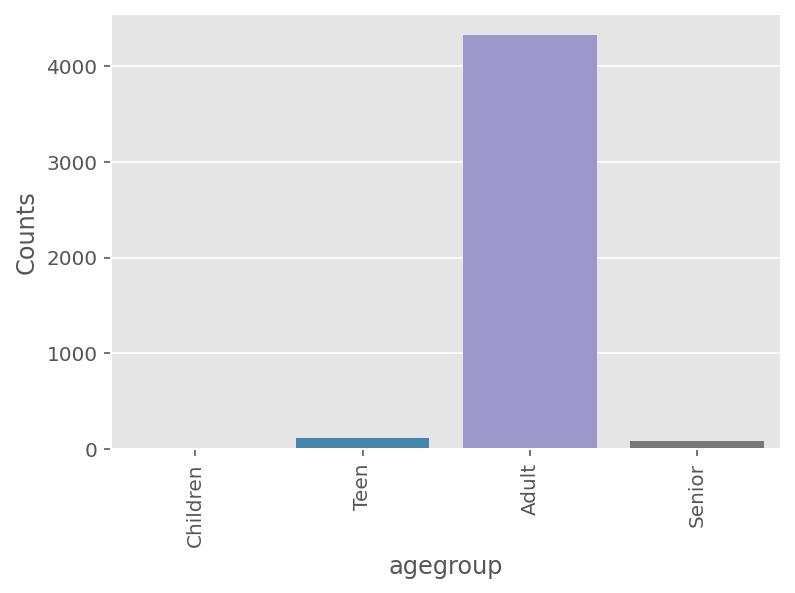

In [23]:
df_cat = bank[['job', 'marital', 'education', 'contact', 'month','poutcome', 'agegroup']]

# visualising categorical features
display(HTML('<b>Plot 1.1: Categorical Features</b>'))
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total categories = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.ylabel('Counts')
    plt.xlabel(i)
    plt.show()

**Plot 1.2:** These plot show the visualization of the counts for all binary variables from the dataset, namely the variables `default`, `housing` and `loan`.

Graph for default: total categories = 2


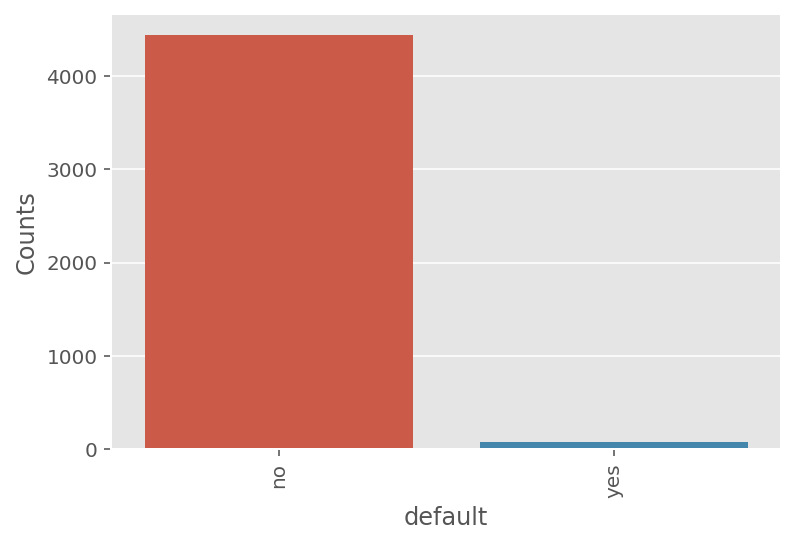

Graph for housing: total categories = 2


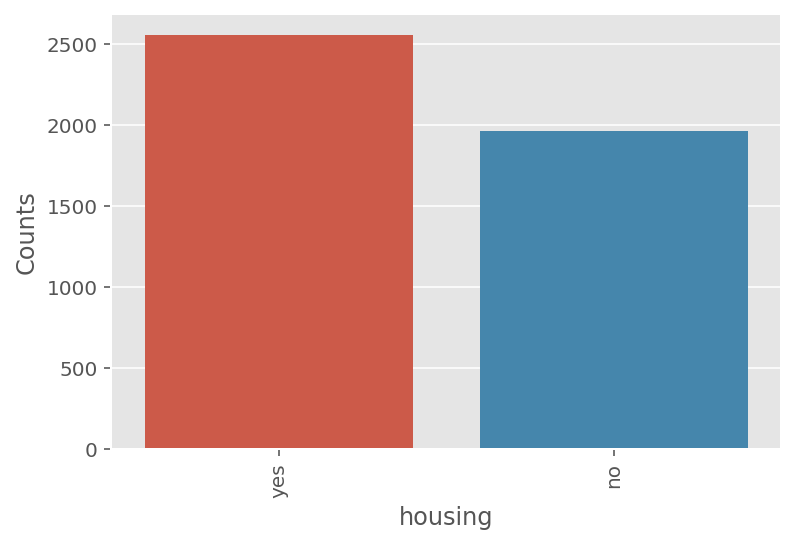

Graph for loan: total categories = 2


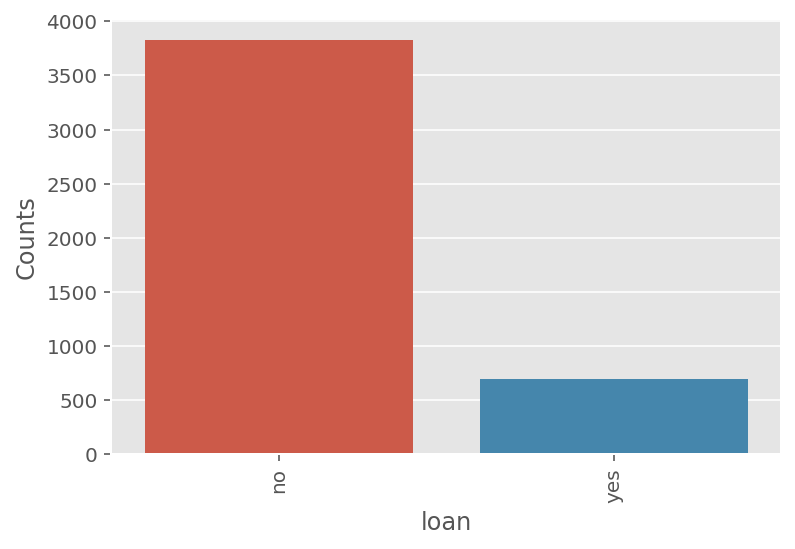

Graph for pdays: total categories = 2


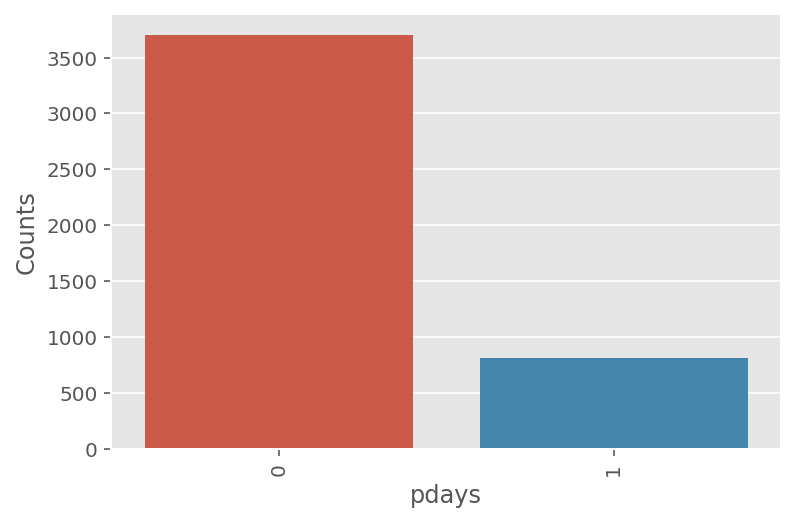

In [24]:
df_binary = bank[['default', 'housing', 'loan', 'pdays']]

# visualising binary features
display(HTML('<b>Plot 1.2: Binary Features</b>'))
for i in df_binary.columns:
    cat_num = df_binary[i].value_counts()
    print("Graph for %s: total categories = %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.ylabel('Counts')
    plt.xlabel(i)
    plt.show()

**Plot 1.3:** This histogram shows the distribution of the `Age`.

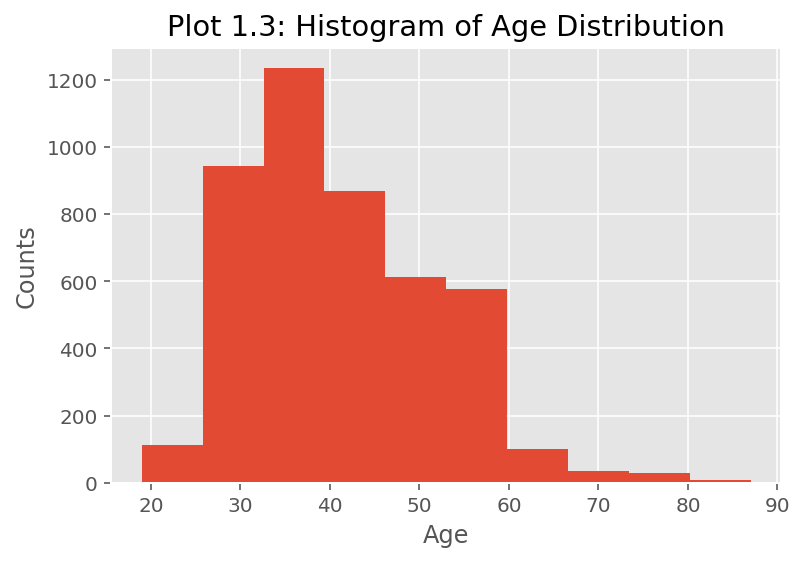

In [25]:
# histogram of 'Age' distribution
bank.age.hist()
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Plot 1.3: Histogram of Age Distribution')
plt.show()

## Two-Variable Plots <a id='Two_plots'></a>

**Plot 2.1:** The scatterplot below explores the relationship of `Balance` against `Age`.

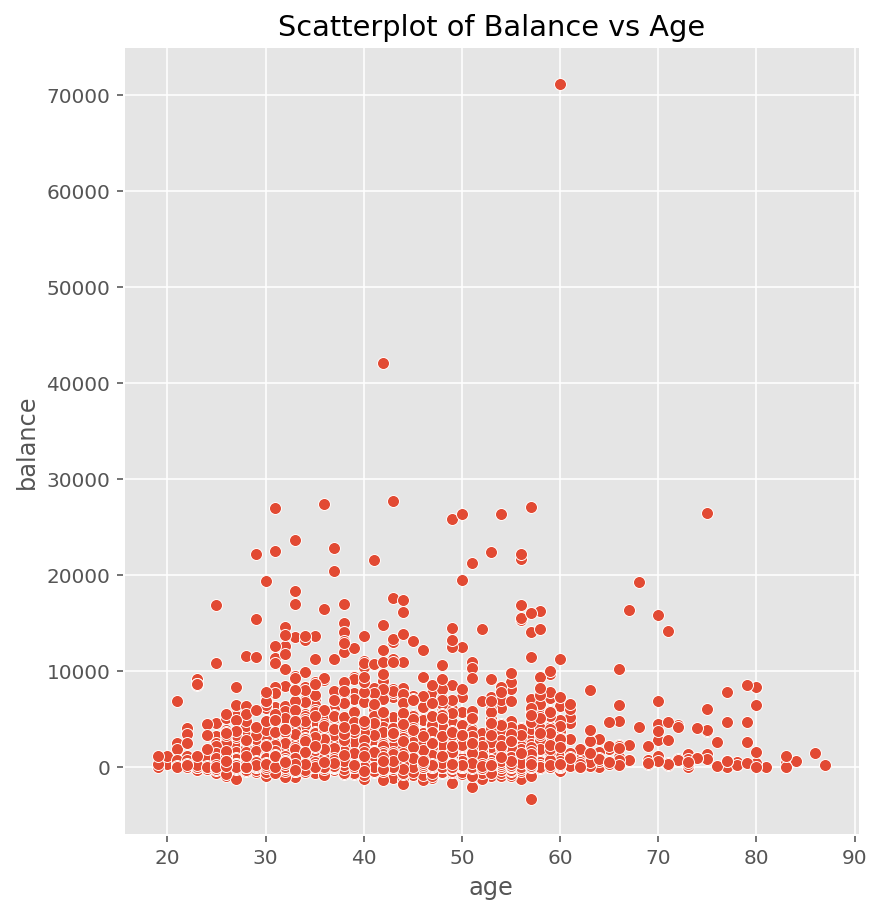

In [26]:
# Continuous age range
display(HTML('<b>Plot 2.1: Scatterplot</b>'))
sns.relplot(x="age", 
            y="balance", 
            height=6, 
            data=bank);
plt.title('Scatterplot of Balance vs Age')
plt.show()

**Plot 2.2:** The Catplot below explores the relationship between `Balance` and `Education`.

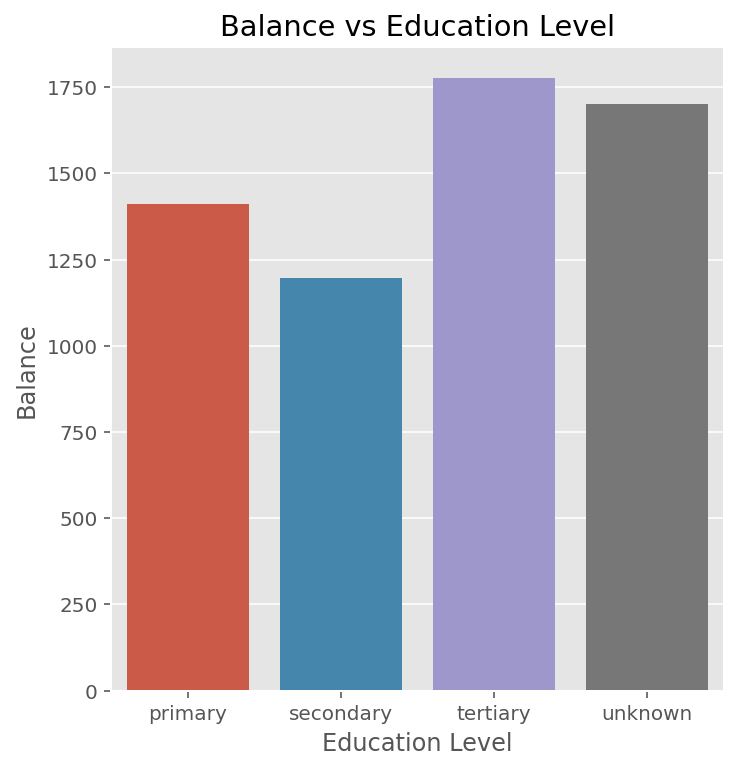

In [27]:
display(HTML('<b>Plot 2.2: Catplot</b>'))
# Draw a nested barplot by species and sex
sns.catplot(
    data=bank, kind="bar",
    x="education", y="balance",
    ci = None
    )
plt.title('Balance vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Balance')
plt.show()

**Plot 2.3:** The Catplot below explores the relationship between `Balance` and `Marital Status`.

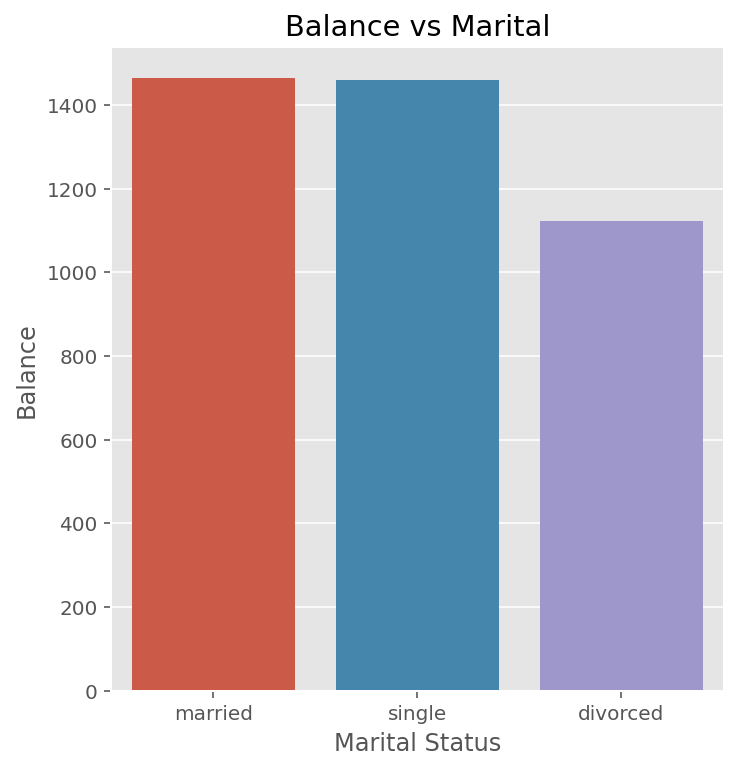

In [28]:
# Categorical Age Group
display(HTML('<b>Plot 2.3: Catplot</b>'))
# Draw a nested barplot by species and sex
sns.catplot(
    data=bank, kind="bar",
    x="marital", y="balance",
    ci = None
    )
plt.title('Balance vs Marital')
plt.xlabel('Marital Status')
plt.ylabel('Balance')
plt.show()

## Three-Variable Plots <a id='Three_Plots'></a>

**Plot 3.1:** The Scatterplot Matrix below explores the correlation between all variables.

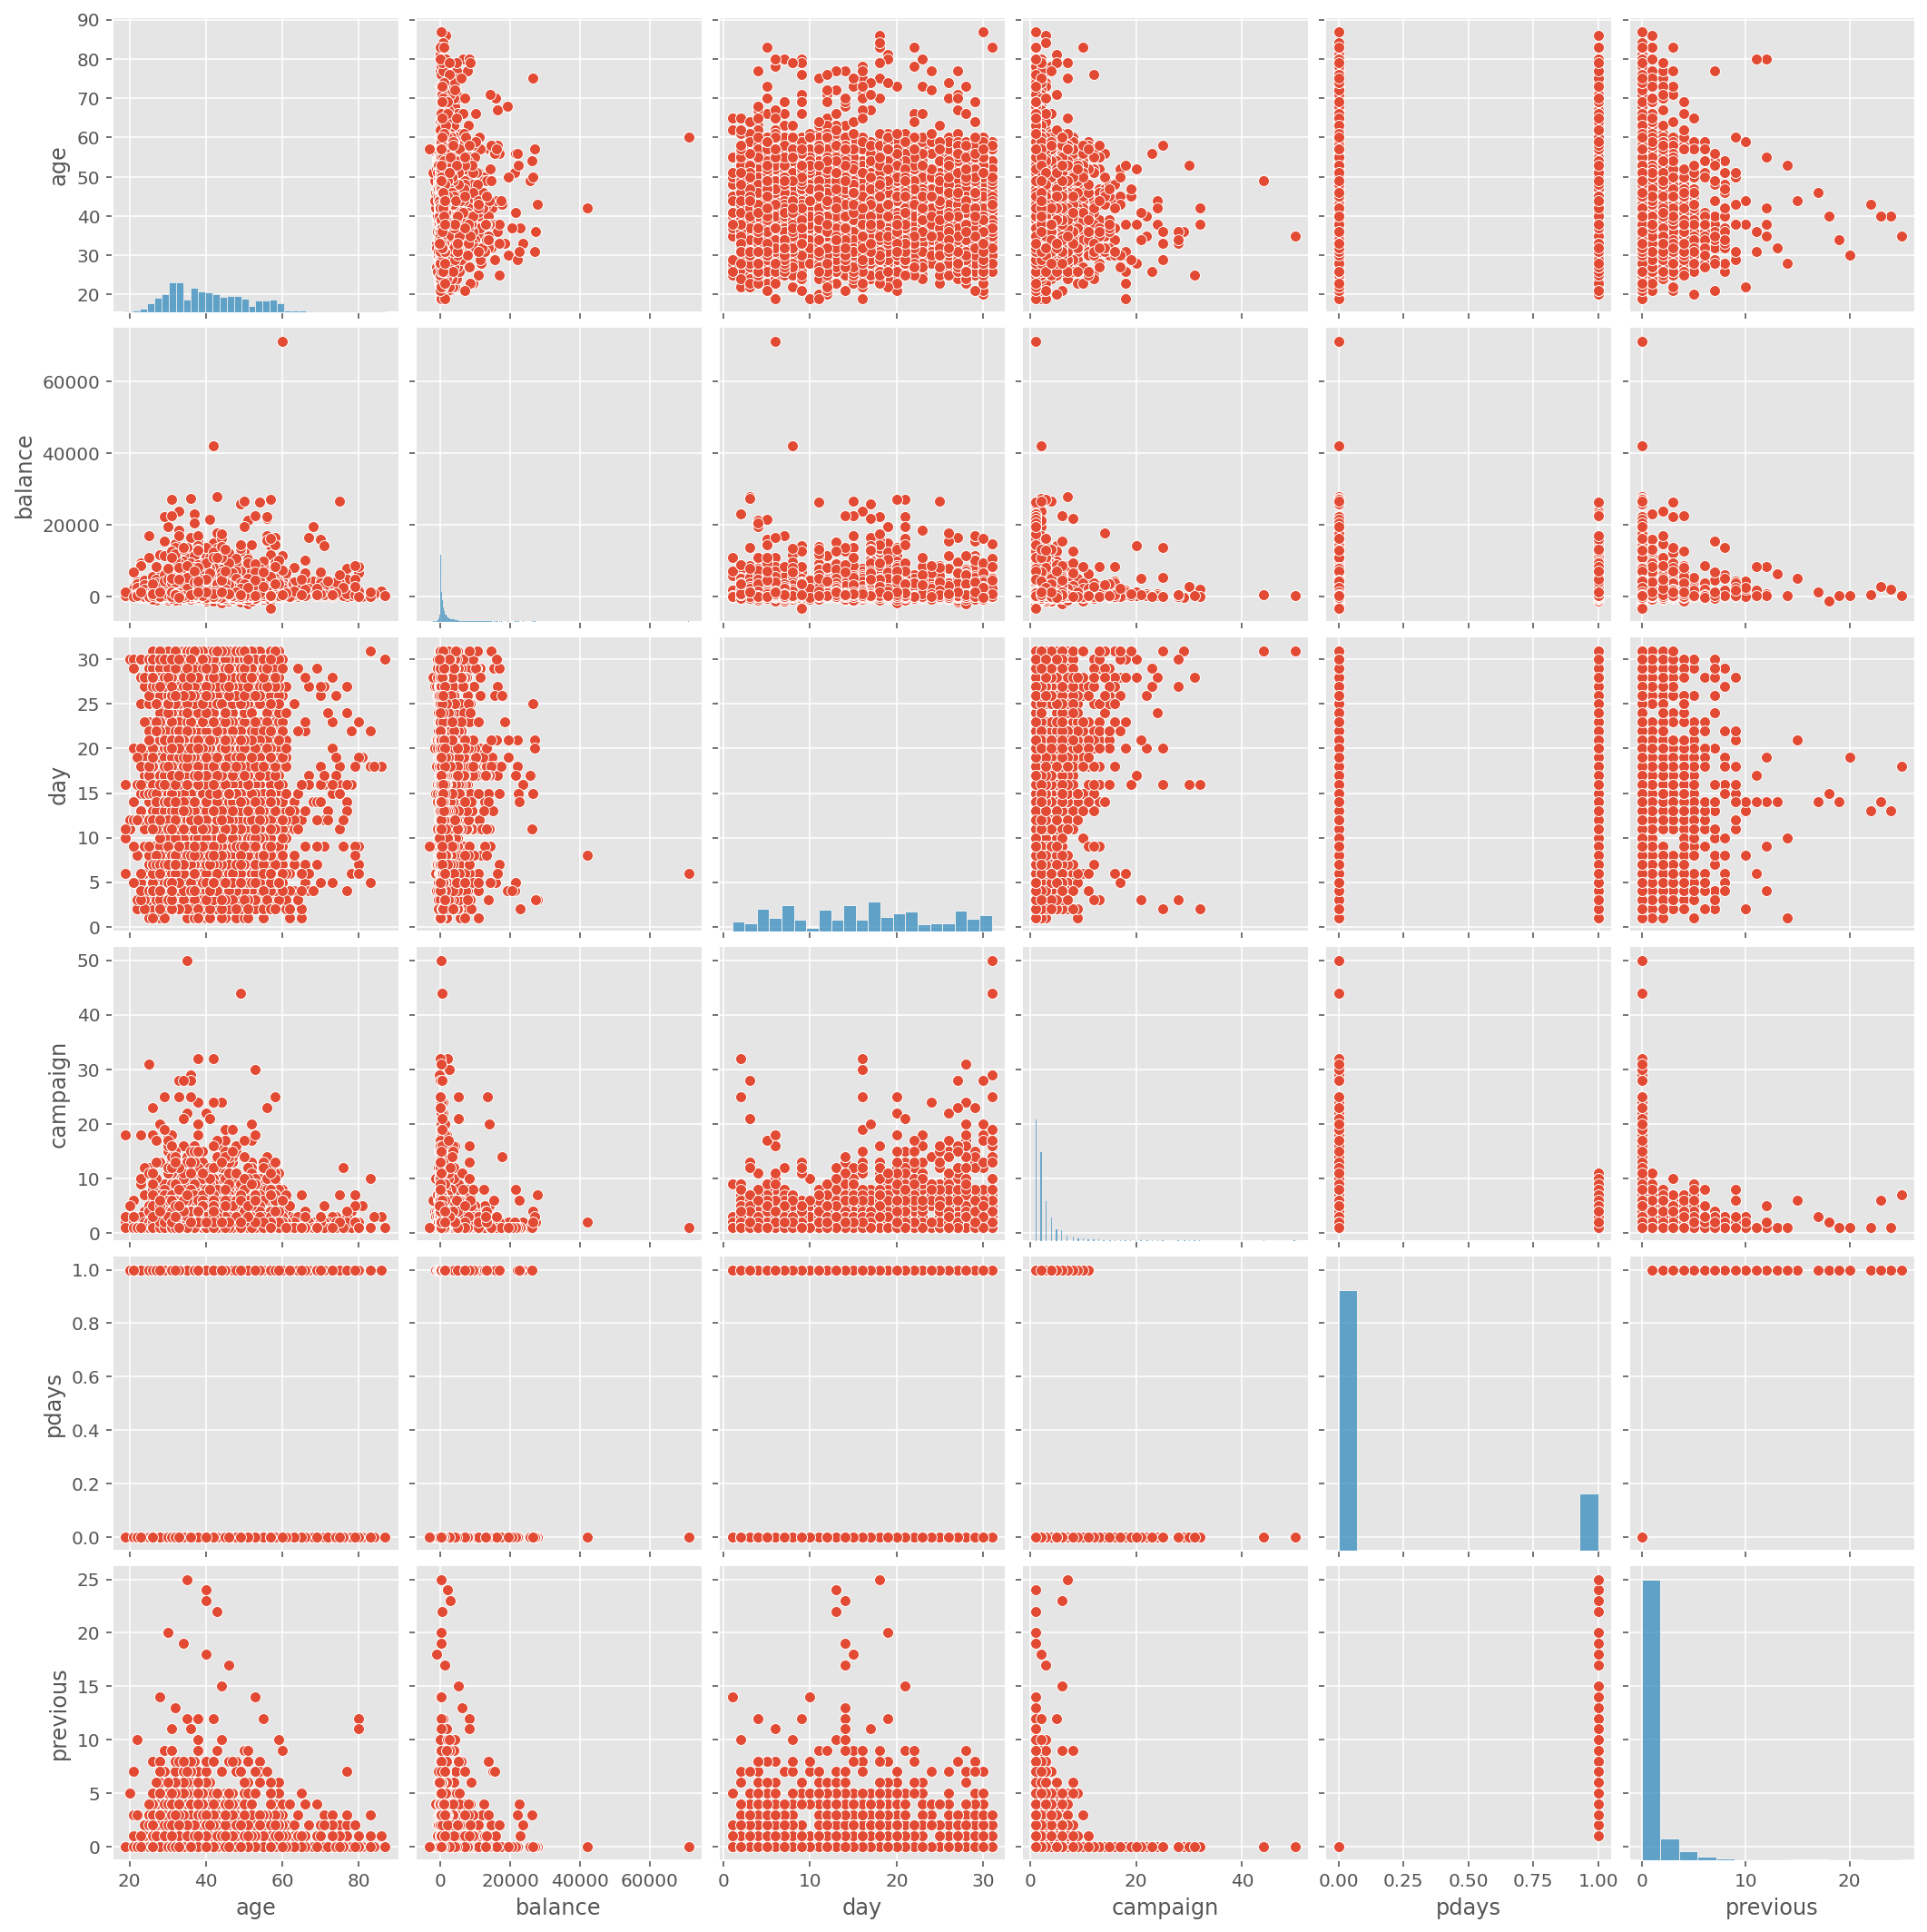

In [29]:
display(HTML('<b>Plot 3.1: Scatterplot Matrix</b>'))
sns.pairplot(bank)
plt.show()

**Plot 3.2:** The Correlation Matrix below explores the strength of correlation between all variables.

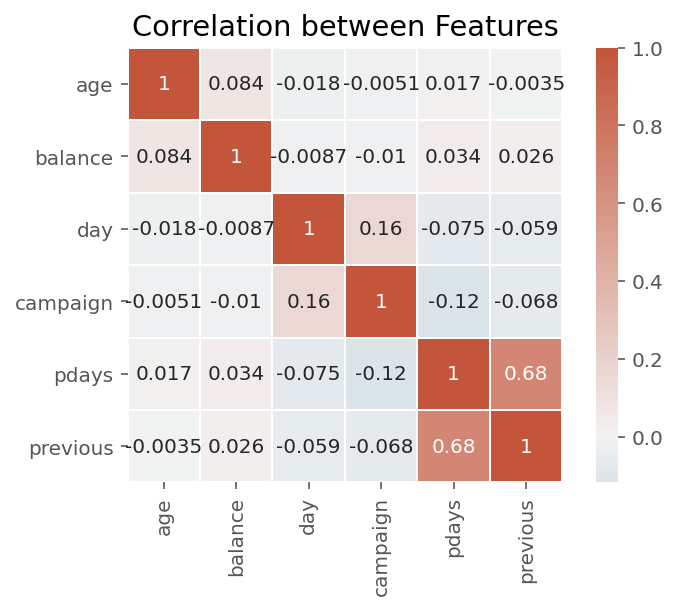

In [30]:
# correlation matrix
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
display(HTML('<b>Plot 3.2: Correlation Matrix</b>'))
sns.heatmap(bank.corr(), cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5)
plt.title('Correlation between Features')
plt.show()

**Plot 3.3:** The Relational Plot below explores the relationship between `Balance` and `Age` grouped by `Marital`

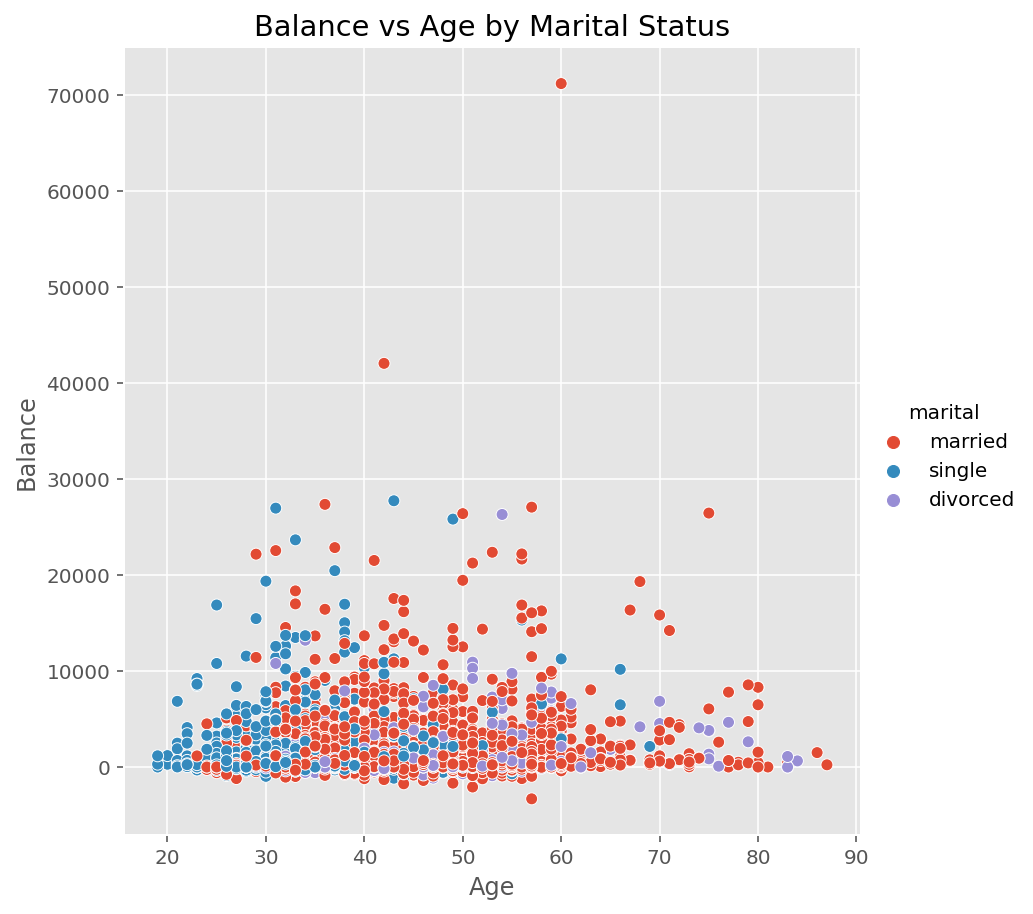

In [31]:
display(HTML('<b>Plot 3.3: Relational Plot</b>'))
sns.relplot(x="age", 
            y="balance", 
            hue="marital", 
            height=6, 
            data=bank);
plt.title('Balance vs Age by Marital Status')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

## References <a id='References'></a>

1. UCI Machine Learning Repository: Bank Marketing Data Set. (2021). Retrieved 21 March 2021, from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

2. Age Standard, 2014, Version 1.7. (2021). Retrieved 21 March 2021, from https://www.abs.gov.au/statistics/standards/age-standard/latest-release

3. Plotting a correlation matrix — seaborn 0.11.1 documentation. (2021). Retrieved 22 March 2021, from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

4. 	Dr. Vural Aksakalli | Data Preparation for Machine Learning | www.featureranking.com. (2021). Retrieved 22 March 2021, from https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/

5. seaborn.relplot — seaborn 0.11.1 documentation. (2021). Retrieved 28 March 2021, from https://seaborn.pydata.org/generated/seaborn.relplot.html

6. seaborn.catplot — seaborn 0.11.1 documentation. (2021). Retrieved 28 March 2021, from https://seaborn.pydata.org/generated/seaborn.catplot.html

7. seaborn.pairplot — seaborn 0.11.1 documentation. (2021). Retrieved 28 March 2021, from https://seaborn.pydata.org/generated/seaborn.pairplot.html

8. Plotting a diagonal correlation matrix — seaborn 0.11.1 documentation. (2021). Retrieved 28 March 2021, from https://seaborn.pydata.org/examples/many_pairwise_correlations.html